# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)
prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
df_tweet_data = pd.read_csv("tweet-json.txt",sep = "\n",names=['json_data'])

In [9]:
df_tweet = pd.DataFrame()
for index, row in df_tweet_data.iterrows():
    json_object = json.loads(row['json_data'])
    df_tweet=df_tweet.append({'tweet_id':json_object['id'],'retweet_count':json_object['retweet_count'],'favorite_count': json_object['favorite_count']},ignore_index=True)

In [10]:
df_tweet.head()

,favorite_count,retweet_count,tweet_id
0,39467.0,8853.0,8.924206e+17
1,33819.0,6514.0,8.921774e+17
2,25461.0,4328.0,8.918152e+17
3,42908.0,8964.0,8.916896e+17
4,41048.0,9774.0,8.913276e+17


In [11]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null float64
retweet_count     2354 non-null float64
tweet_id          2354 non-null float64
dtypes: float64(3)
memory usage: 55.2 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
#for visual assessment

In [13]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
df_tweet

,favorite_count,retweet_count,tweet_id
0,39467.0,8853.0,8.924206e+17
1,33819.0,6514.0,8.921774e+17
2,25461.0,4328.0,8.918152e+17
3,42908.0,8964.0,8.916896e+17
4,41048.0,9774.0,8.913276e+17
5,20562.0,3261.0,8.910880e+17
6,12041.0,2158.0,8.909719e+17
7,56848.0,16716.0,8.907292e+17
8,28226.0,4429.0,8.906092e+17
9,32467.0,7711.0,8.902403e+17


In [16]:
len(archive[archive.tweet_id.duplicated()])

0

In [17]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
archive['rating_denominator'].value_counts().sort_values()

70        1
170       1
150       1
130       1
120       1
110       1
90        1
15        1
0         1
40        1
16        1
2         1
7         1
20        2
80        2
50        3
11        3
10     2333
Name: rating_denominator, dtype: int64

In [19]:
archive[archive['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [20]:
archive['rating_numerator'].value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [21]:
archive['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
an             7
Toby           7
Buddy          7
Bailey         7
Stanley        6
Scout          6
Leo            6
Bella          6
Jack           6
Jax            6
Koda           6
Milo           6
Dave           6
Rusty          6
Oscar          6
Louis          5
            ... 
Lizzie         1
Koko           1
Timber         1
Todo           1
Ralphus        1
Lance          1
Mosby          1
Odin           1
Jessiga        1
Roscoe         1
Arya           1
Jersey         1
Fletcher       1
Schnitzel      1
Jay            1
Pete           1
Ruffles        1
Snoop          1
Bubba          1
Jiminus        1
Ridley         1
Mabel          1
Dotsy          1
Autumn         1
Devón          1
Kayla          1
Mauve          1
Harnold       

In [22]:
archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [24]:
len(prediction[prediction.tweet_id.duplicated()])

0

In [25]:
len(prediction[prediction.jpg_url.duplicated()])

66

In [26]:
len(df_tweet[df_tweet.tweet_id.duplicated()])

0

### Quality issues
1. Name column in archive has names like 'a', 'an', 'the', 'my', 'not', 'None' which could be removed or can be grouped into a diff category like 'unknown'

2. Source contains HTML parameters in the source column

3. jpg_url contains duplicate rows

4. Prediction table has values which contains p1_dog,p2_dog,p3_dog as False

5. img_num is not required and can be removed

6. Finding the max conf score for each prediction and selecting the breed name

7. Rating Denominator consist of 0 in  archive dataframe

8. Selecting the best result from p1_conf, p2_conf and p3_conf in the prediction dataframe

9. Timestamp and retweeted_status_timestamp must be datetime instead of the object type


### Tidiness issues
1. Archive is the main dataframe but there are other informations present in other dataframes. So we need to merge all the files which has relevant data.

2. Combining the dog stage in to single column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [68]:
# # Make copies of original pieces of data
archive_copy = archive.copy()
prediction_copy = prediction.copy()
df_tweet_copy = df_tweet.copy()

### Issue #1: Null Values in dog names

#### Define: Remove names like 'a, an, the, this, None,O, his' from the dog names column

#### Code

In [69]:
# Spotting error names
namelist=archive_copy['name'].unique()
print(namelist)        

['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' 'None' 'Jax' 'Zoey' 'Cassie'
 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus' 'Canela'
 'Gerald' 'Jeffrey' 'such' 'Maya' 'Mingus' 'Derek' 'Roscoe' 'Waffles'
 'Jimbo' 'Maisey' 'Lilly' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah' 'Bella'
 'Grizzwald' 'Rusty' 'Gus' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary' 'a'
 'Elliot' 'Louis' 'Jesse' 'Romeo' 'Bailey' 'Duddles' 'Jack' 'Emmy' 'Steven'
 'Beau' 'Snoopy' 'Shadow' 'Terrance' 'Aja' 'Penny' 'Dante' 'Nelly' 'Ginger'
 'Benedict' 'Venti' 'Goose' 'Nugget' 'Cash' 'Coco' 'Jed' 'Sebastian'
 'Walter' 'Sierra' 'Monkey' 'Harry' 'Kody' 'Lassie' 'Rover' 'Napolean'
 'Dawn' 'Boomer' 'Cody' 'Rumble' 'Clifford' 'quite' 'Dewey' 'Scout' 'Gizmo'
 'Cooper' 'Harold' 'Shikha' 'Jamesy' 'Lili' 'Sammy' 'Meatball' 'Paisley'
 'Albus' 'Neptune' 'Quinn' 'Belle' 'Zooey' 'Dave' 'Jersey' 'Hobbes' 'Burt'
 'Lorenzo' 'Carl' 'Jordy' 'Milky' 'Trooper' 'Winston' 'Sophie' 'Wyatt'
 'Rosie' 'Thor' 'Oscar' 'Luna' 'Callie' 'Cermet' 'George'

In [70]:
# Replacing with Unknown Value
replace_names= ['a', 'an', 'the', 'None' ,'O', 'this', 'all', 'his', 'just']
replace_with= 'Unknown'

archive_copy['name']=archive_copy['name'].replace(replace_names,replace_with)

#### Test

In [71]:
print(archive_copy['name'].unique())

['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' 'Unknown' 'Jax' 'Zoey'
 'Cassie' 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus'
 'Canela' 'Gerald' 'Jeffrey' 'such' 'Maya' 'Mingus' 'Derek' 'Roscoe'
 'Waffles' 'Jimbo' 'Maisey' 'Lilly' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah'
 'Bella' 'Grizzwald' 'Rusty' 'Gus' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary'
 'Elliot' 'Louis' 'Jesse' 'Romeo' 'Bailey' 'Duddles' 'Jack' 'Emmy' 'Steven'
 'Beau' 'Snoopy' 'Shadow' 'Terrance' 'Aja' 'Penny' 'Dante' 'Nelly' 'Ginger'
 'Benedict' 'Venti' 'Goose' 'Nugget' 'Cash' 'Coco' 'Jed' 'Sebastian'
 'Walter' 'Sierra' 'Monkey' 'Harry' 'Kody' 'Lassie' 'Rover' 'Napolean'
 'Dawn' 'Boomer' 'Cody' 'Rumble' 'Clifford' 'quite' 'Dewey' 'Scout' 'Gizmo'
 'Cooper' 'Harold' 'Shikha' 'Jamesy' 'Lili' 'Sammy' 'Meatball' 'Paisley'
 'Albus' 'Neptune' 'Quinn' 'Belle' 'Zooey' 'Dave' 'Jersey' 'Hobbes' 'Burt'
 'Lorenzo' 'Carl' 'Jordy' 'Milky' 'Trooper' 'Winston' 'Sophie' 'Wyatt'
 'Rosie' 'Thor' 'Oscar' 'Luna' 'Callie' 'Cermet' 'George' 

In [72]:
print(archive_copy['name'].value_counts())

Unknown      823
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
Daisy          7
Bailey         7
Toby           7
Buddy          7
Rusty          6
Scout          6
Leo            6
Stanley        6
Oscar          6
Milo           6
Bella          6
Koda           6
Dave           6
Jax            6
Jack           6
Larry          5
Gus            5
Sammy          5
Phil           5
            ... 
Tedrick        1
Champ          1
Crumpet        1
Sprout         1
Brudge         1
Orion          1
Snoop          1
Ruffles        1
Pete           1
Dutch          1
Rufio          1
Mollie         1
Socks          1
Emanuel        1
Kaia           1
Huck           1
Chevy          1
Darby          1
Sky            1
Erik           1
Bookstore      1
Genevieve      1
Jessiga        1
Arya           1
Jersey         1
Teddy          1
Fletcher       1
Schnitzel     

### Issue #2: HTML Parameters in source

#### Define: Replace html parameters with Categorical strings in the source columns

#### Code

In [73]:
archive_copy['source'] = archive_copy['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_copy['source'] = archive_copy['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
archive_copy['source'] = archive_copy['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive_copy['source'] = archive_copy['source'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [74]:
archive_copy['source'].value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

### Issue #3: Duplicate entries in jpg_url column in prediction dataframe

#### Define: Drop duplicate entries from jpg_url column in prediction dataframe

#### Code

In [75]:
prediction_copy = prediction_copy.drop_duplicates(subset='jpg_url')

#### Test

In [35]:
len(prediction_copy[prediction_copy.jpg_url.duplicated()])

0

### Issue #4: Prediction dataframe contains data which are not of dogs

#### Define: Remove entries from p1_dog,p2_dog,p3_dog column in prediction dataframe

#### Code

In [76]:
prediction_copy = prediction_copy[((prediction_copy['p1_dog'] == True) & 
                  (prediction_copy['p2_dog'] == True) & 
                  (prediction_copy['p3_dog'] == True))]

#### Test

In [37]:
prediction_copy[((prediction_copy['p1_dog'] == False) & 
                  (prediction_copy['p2_dog'] == False) & 
                  (prediction_copy['p3_dog'] == False))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #5: Image number in Prediction dataframe 

#### Define: Remove img_num column in prediction dataframe

#### Code

In [77]:
prediction_copy = prediction_copy.drop(['img_num'], axis=1)

#### Test

In [39]:
prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1206 non-null int64
jpg_url     1206 non-null object
p1          1206 non-null object
p1_conf     1206 non-null float64
p1_dog      1206 non-null bool
p2          1206 non-null object
p2_conf     1206 non-null float64
p2_dog      1206 non-null bool
p3          1206 non-null object
p3_conf     1206 non-null float64
p3_dog      1206 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 88.3+ KB


In [40]:
prediction_copy.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #6: Getting the datatypes correct

#### Define: Convert the tweet id and other ids to str and datetime fileds to appropriate datatypes

#### Code

In [88]:
archive_copy['tweet_id'] = archive_copy['tweet_id'].astype(str)
prediction_copy['tweet_id'] = prediction_copy['tweet_id'].astype(str)


archive_copy.in_reply_to_status_id = archive_copy.in_reply_to_status_id.astype(str)
archive_copy.in_reply_to_user_id = archive_copy.in_reply_to_user_id.astype(str)
archive_copy.retweeted_status_id = archive_copy.retweeted_status_id.astype(str)
archive_copy.retweeted_status_user_id = archive_copy.retweeted_status_user_id.astype(str)

archive_copy.retweeted_status_timestamp = pd.to_datetime(archive_copy.retweeted_status_timestamp) 
archive_copy.timestamp = pd.to_datetime(archive_copy.timestamp)

df_tweet_copy['tweet_id']=df_tweet_copy['tweet_id'].apply(lambda x: "{:.0f}".format(x))
df_tweet_copy['favorite_count'] = df_tweet_copy['favorite_count'].astype(int)
df_tweet_copy['retweet_count'] = df_tweet_copy['retweet_count'].astype(int)
df_tweet_copy['tweet_id'] = df_tweet_copy['tweet_id'].astype(str)

#### Test

In [42]:
archive_copy.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [43]:
prediction_copy.dtypes

tweet_id     object
jpg_url      object
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [44]:
df_tweet_copy.dtypes

favorite_count     int64
retweet_count      int64
tweet_id          object
dtype: object

### Issue #7: Rating Denominator consist of 0 in  archive dataframe

#### Define: Remove rows which has 0 as denominator in archive dataframe

#### Code

In [78]:
archive_copy=archive_copy.drop(archive_copy[archive_copy['rating_denominator']==0].index)

#### Test

In [46]:
archive_copy[archive_copy['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #8: Finding the best conf score and finding the breed

#### Define: Finding the breed of dog by examining the highest prediction score

#### Code

In [79]:
prediction_copy.loc[((prediction_copy['p1_conf']  >= prediction_copy['p2_conf']) & (prediction_copy['p1_conf']  >= prediction_copy['p3_conf'])), 'dog_breed' ] = prediction_copy['p1'] 
prediction_copy.loc[((prediction_copy['p2_conf']  >= prediction_copy['p1_conf']) & (prediction_copy['p2_conf']  >= prediction_copy['p3_conf'])), 'dog_breed' ] = prediction_copy['p2'] 
prediction_copy.loc[((prediction_copy['p3_conf']  >= prediction_copy['p1_conf']) & (prediction_copy['p3_conf']  >= prediction_copy['p2_conf'])), 'dog_breed' ] = prediction_copy['p3'] 

#### Test

In [48]:
prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id     1206 non-null object
jpg_url      1206 non-null object
p1           1206 non-null object
p1_conf      1206 non-null float64
p1_dog       1206 non-null bool
p2           1206 non-null object
p2_conf      1206 non-null float64
p2_dog       1206 non-null bool
p3           1206 non-null object
p3_conf      1206 non-null float64
p3_dog       1206 non-null bool
dog_breed    1206 non-null object
dtypes: bool(3), float64(3), object(6)
memory usage: 97.8+ KB


In [49]:
prediction_copy.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


In [80]:
prediction_copy=prediction_copy.drop(columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'])

In [51]:
prediction_copy.head()

,tweet_id,jpg_url,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


### Issue #9: Combining the dog stages

#### Define: combining the dog stages into single column

#### code

In [81]:
archive_copy.loc[(archive_copy['doggo'].str.lower().str.strip() == 'doggo'), 'doggo'] = True 
archive_copy.loc[(archive_copy['floofer'].str.lower().str.strip() == 'floofer'), 'floofer'] = True 
archive_copy.loc[(archive_copy['pupper'].str.lower().str.strip() == 'pupper'), 'pupper'] = True 
archive_copy.loc[(archive_copy['puppo'].str.lower().str.strip() == 'puppo'), 'puppo'] = True 

In [53]:
archive_copy[archive_copy['floofer'] == True].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,nan,nan,2017-07-07 16:22:55,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,nan,nan,NaT,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,True,None,None
200,854010172552949760,nan,nan,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",nan,nan,NaT,https://twitter.com/dog_rates/status/854010172...,11,10,Unknown,True,True,None,None


In [82]:
for ind in archive_copy.index:
    comb_lst = []
    if(archive_copy['doggo'][ind] == True):
        comb_lst.append('doogo')
    if(archive_copy['floofer'][ind] == True):
        comb_lst.append('floofer')
    if(archive_copy['pupper'][ind] == True):
        comb_lst.append('pupper')
    if(archive_copy['puppo'][ind] == True):
        comb_lst.append('puppo')
    archive_copy.loc[ind,'dog_stage'] = ','.join(comb_lst)

In [79]:
archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unknown
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unknown
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unknown
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unknown
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unknown


In [55]:
archive_copy[(archive_copy['doggo'] == True)].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
9,890240255349198849,nan,nan,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,nan,nan,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,True,None,None,None,doogo
43,884162670584377345,nan,nan,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,nan,nan,NaT,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,True,None,None,None,doogo
99,872967104147763200,nan,nan,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,nan,nan,NaT,https://twitter.com/dog_rates/status/872967104...,12,10,Unknown,True,None,None,None,doogo
108,871515927908634625,nan,nan,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,nan,nan,NaT,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,True,None,None,None,doogo
110,871102520638267392,nan,nan,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,nan,nan,NaT,https://twitter.com/animalcog/status/871075758...,14,10,Unknown,True,None,None,None,doogo


In [56]:
archive_copy[((archive_copy['doggo'] == True) & (archive_copy['floofer'] == True))].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
200,854010172552949760,nan,nan,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",nan,nan,NaT,https://twitter.com/dog_rates/status/854010172...,11,10,Unknown,True,True,None,None,"doogo,floofer"


In [83]:
for ind in archive_copy.index:
    if (archive_copy['doggo'][ind] == 'None') & (archive_copy['floofer'][ind] == 'None') & (archive_copy['pupper'][ind] == 'None') & (archive_copy['puppo'] [ind]== 'None'):
        archive_copy['dog_stage'][ind]= 'Unknown'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unknown
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unknown
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unknown
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unknown
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unknown


In [84]:
archive_copy=archive_copy.drop(columns=['doggo','floofer','pupper','puppo'])

In [51]:
archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unknown
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unknown
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unknown
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unknown
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unknown


In [52]:
archive_copy.isnull().sum()

tweet_id                         0
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                        0
source                           0
text                             0
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp    2174
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
dog_stage                        0
dtype: int64

In [59]:
archive_copy.shape

(2355, 18)

### Issue #10: Removing retweet ids

### Define #10: Removing all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

### Code

In [85]:
archive_copy = archive_copy[archive_copy.retweeted_status_id.isnull()]
archive_copy = archive_copy[archive_copy.retweeted_status_user_id.isnull()]
archive_copy = archive_copy[archive_copy.retweeted_status_timestamp.isnull()]

### Test

In [86]:
archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unknown
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unknown
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unknown
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unknown
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unknown


In [87]:
archive_copy.shape

(2174, 14)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [90]:
twitter_archive_master = archive_copy.merge(prediction_copy,how = 'left', on = 'tweet_id')

In [91]:
twitter_archive_master = twitter_archive_master.merge(df_tweet_copy,how = 'left', on = 'tweet_id')

In [92]:
twitter_archive_master.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,favorite_count,retweet_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unknown,NaN,NaN,NaN,NaN


In [93]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Lucy and Charlie are the most common name for the dog with a count of 11 when compared with all the dog names followed by Cooper, Oliver with a count of 10.

2. Golden Retriever is the most common dog breed followed by Labrador Retriever and Pembroke

3. pupper is the favourite as well as most retweeted dog stage

### Visualization

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Sadie       8
Lola        8
Winston     8
Toby        7
Name: name, dtype: int64


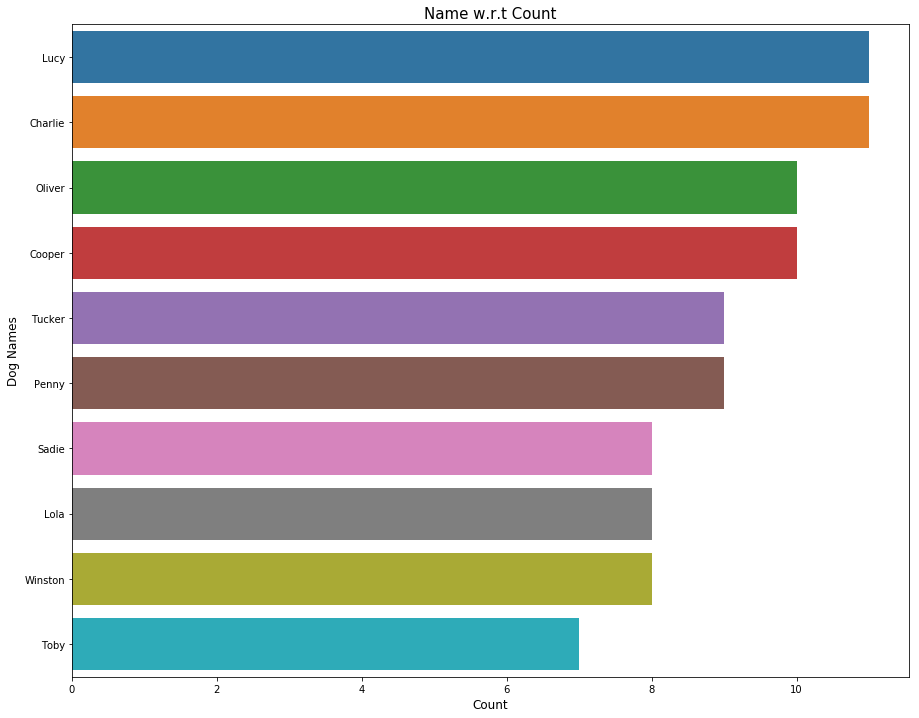

In [94]:
# Finding the most common name for the dog
top_names= twitter_archive_master[twitter_archive_master.name != 'Unknown']['name'].value_counts()
top_names_plot=top_names.head(10)
print(top_names_plot)

plt.figure(figsize=(15,12))
sns.barplot(y=top_names_plot.index, x=top_names_plot.values)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Dog Names', fontsize=12)
plt.title("Name w.r.t Count", fontsize=15)
plt.show()

golden_retriever      119
Pembroke               77
Labrador_retriever     75
Chihuahua              50
pug                    39
Name: dog_breed, dtype: int64


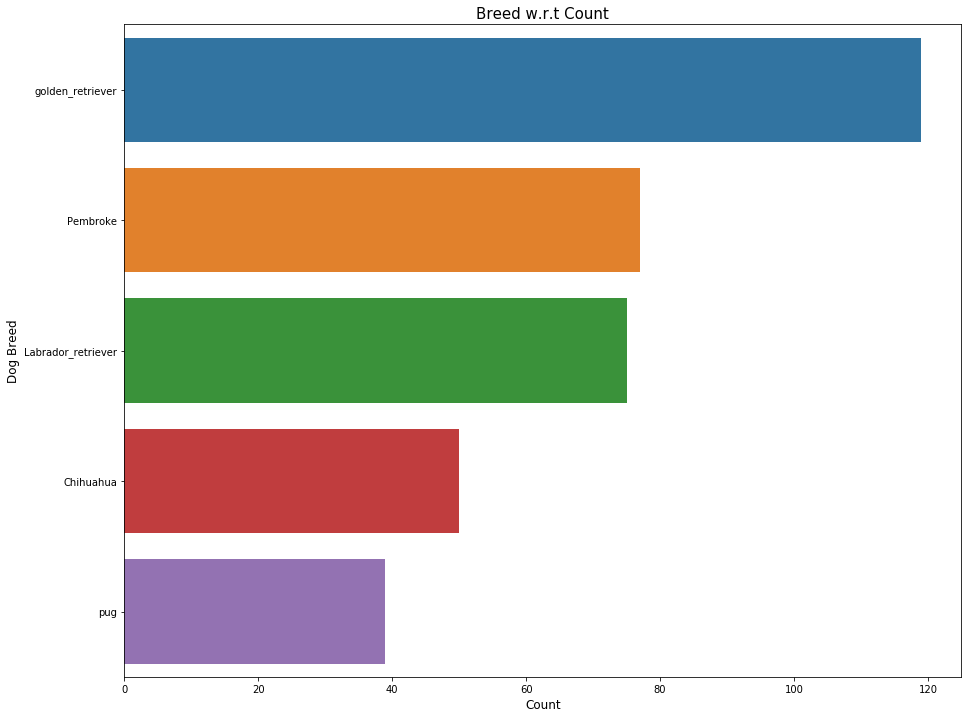

In [95]:
# Finding the common dog breed
top_breed= twitter_archive_master['dog_breed'].value_counts()
top_breed_plot= top_breed.head()
print(top_breed_plot)

plt.figure(figsize=(15,12))
sns.barplot(y=top_breed_plot.index, x=top_breed_plot.values)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Dog Breed', fontsize=12)
plt.title("Breed w.r.t Count", fontsize=15)
plt.show()

pupper           224
doogo             75
puppo             24
doogo,pupper      10
floofer            9
doogo,floofer      1
doogo,puppo        1
Name: dog_stage, dtype: int64


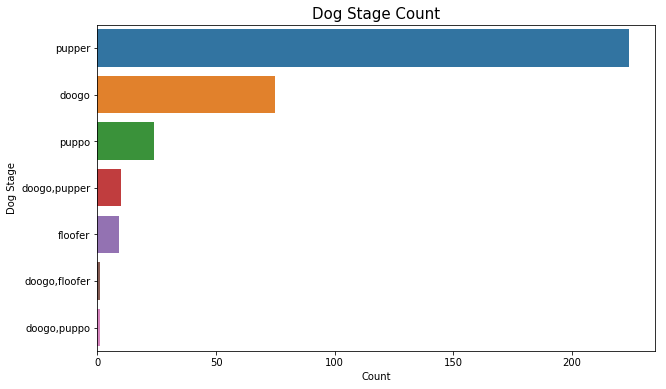

In [96]:
# Dog_stage values based on the count after removing unknown values
dog_stage_count=twitter_archive_master[twitter_archive_master.dog_stage != 'Unknown']['dog_stage'].value_counts()
print(dog_stage_count)

plt.figure(figsize=(10,6))
sns.barplot(y=dog_stage_count.index, x=dog_stage_count.values)
plt.xlabel('Count')
plt.ylabel('Dog Stage')
plt.title("Dog Stage Count", fontsize=15)
plt.show()

In [97]:
#Finding the favourite dog stage
favourite_dog_stage=twitter_archive_master.query('dog_stage!="Unknown"').groupby('dog_stage').favorite_count.sum()

In [98]:
favourite_dog_stage=favourite_dog_stage.sort_values(ascending=False)
favourite_dog_stage

dog_stage
pupper           1038740.0
doogo             586804.0
puppo             252755.0
doogo,pupper       84157.0
doogo,puppo        47844.0
floofer            23655.0
doogo,floofer      17169.0
Name: favorite_count, dtype: float64

In [99]:
#Grouping by dog stages and getting a sum of retweets for each dog stage
dog_stage_retweets=twitter_archive_master.query('dog_stage!="Unknown"').groupby('dog_stage').retweet_count.sum()

In [100]:
dog_stage_retweets=dog_stage_retweets.sort_values(ascending=False)
dog_stage_retweets

dog_stage
pupper           350379.0
doogo            200113.0
puppo             77813.0
doogo,pupper      29569.0
doogo,puppo       19196.0
floofer            9194.0
doogo,floofer      3433.0
Name: retweet_count, dtype: float64